In [1]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [35]:
device = "mps"

In [36]:

from refactored import CLIPWrapper, VQGAN_CLIP
from loaders import load_default
vqgan = load_default(device)
vqgan.eval()
# clip = CLIPWrapper(device)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
self.input_res = 224


In [24]:
vqgan.decoder.norm_out

GroupNorm(32, 128, eps=1e-06, affine=True)

In [27]:
import torch
def deactivate_batchnorm(m):
    if isinstance(m, torch.nn.GroupNorm):
        m.reset_parameters()
        m.eval()
        with torch.no_grad():
            m.weight.fill_(1.0)
            m.bias.zero_()
vqgan.apply(deactivate_batchnorm)
vqgan.decoder.apply(deactivate_batchnorm)

Decoder(
  (conv_in): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mid): Module(
    (block_1): ResnetBlock(
      (norm1): GroupNorm(32, 512, eps=1e-06, affine=True)
      (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm2): GroupNorm(32, 512, eps=1e-06, affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (attn_1): AttnBlock(
      (norm): GroupNorm(32, 512, eps=1e-06, affine=True)
      (q): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
      (k): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
      (v): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
      (proj_out): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
    )
    (block_2): ResnetBlock(
      (norm1): GroupNorm(32, 512, eps=1e-06, affine=True)
      (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (norm2):

In [35]:
from refactored import CLIPWrapper, VQGAN_CLIP
model = VQGAN_CLIP(vqgan, clip)

In [9]:
pip install pytorchvis

Note: you may need to restart the kernel to use updated packages.


In [8]:
print(dec)

tensor([[[[-0.3084, -0.3260, -0.3360,  ..., -0.3584, -0.3567, -0.3555],
          [-0.3301, -0.3292, -0.3304,  ..., -0.3526, -0.3564, -0.3696],
          [-0.3303, -0.3313, -0.3273,  ..., -0.3504, -0.3505, -0.3508],
          ...,
          [-0.4640, -0.4624, -0.4037,  ..., -0.7329, -0.7614, -0.8049],
          [-0.5243, -0.5287, -0.4978,  ..., -0.8048, -0.7461, -0.7711],
          [-0.5002, -0.4848, -0.5481,  ..., -0.7927, -0.7549, -0.7942]],

         [[-0.3312, -0.3237, -0.3231,  ..., -0.3486, -0.3423, -0.3354],
          [-0.3335, -0.3163, -0.3188,  ..., -0.3378, -0.3435, -0.3510],
          [-0.3288, -0.3208, -0.3222,  ..., -0.3326, -0.3342, -0.3370],
          ...,
          [-0.4946, -0.4837, -0.4123,  ..., -0.7402, -0.7667, -0.7942],
          [-0.5359, -0.5070, -0.4788,  ..., -0.8234, -0.7389, -0.7712],
          [-0.5283, -0.4848, -0.5423,  ..., -0.8191, -0.7798, -0.8128]],

         [[-0.3257, -0.2947, -0.2867,  ..., -0.3130, -0.3137, -0.3174],
          [-0.2967, -0.2839, -

In [28]:
import torchvision
import matplotlib.pyplot as plt
import torch
from latent_utils import get_latent_from_path
z_wom = get_latent_from_path("./test_data/face.jpeg", vqgan)
z_wom = z_wom.clone().detach().requires_grad_()
print(z_wom)
dec = vqgan.decode(z_wom)

# x_samples = torch.clamp((dec + 1.0) / 2.0, min=0.0, max=1.0)
# print(x_samples[0].movedim(0, 2).shape)
# man = "a picture of a man"
# woman = "a picture of a woman"
# mantok = clip.tokenize([man]).to(device)
# mantxt = clip.model.encode_text(mantok)
# womtok = clip.tokenize([woman]).to(device)
# womtxt = clip.model.encode_text(womtok)
# cuts = clip.get_normed_cutouts(x_samples)
# # out = clip.model(cuts, womtok)


# plt.imshow(x_samples[0].movedim(0, 2).detach().cpu())


/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/torchvision/transforms/functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


mps
tensor([[[[-0.1188, -0.0473, -0.2141,  ..., -0.0473, -0.0473, -0.1188],
          [-0.2141, -0.1188,  1.7303,  ...,  0.5500, -0.0473,  0.5500],
          [-0.2141,  0.4801, -0.0923,  ...,  0.9553, -0.1188,  0.5500],
          ...,
          [ 0.4880, -0.3169,  0.3479,  ..., -0.4983, -0.7566, -1.4775],
          [ 0.4478, -0.2689, -0.0181,  ..., -0.8739, -0.1091, -1.6654],
          [-0.9200, -0.3169, -1.2975,  ..., -0.3297, -0.9724, -1.4316]],

         [[ 0.1021,  0.1361,  0.0164,  ...,  0.1361,  0.1361,  0.1021],
          [ 0.0164,  0.1021,  0.2840,  ...,  0.2122,  0.1361,  0.2122],
          [ 0.0164,  0.1699,  0.0820,  ...,  0.1012,  0.1021,  0.2122],
          ...,
          [ 0.0237,  0.0713,  0.3117,  ..., -0.0280, -0.0921, -0.3964],
          [-0.0481, -0.0697,  0.2044,  ..., -0.1645,  0.0717, -0.5347],
          [-0.2163,  0.0713, -0.2636,  ..., -0.0503, -0.2491, -0.4324]],

         [[-0.2117,  0.2456,  0.1375,  ...,  0.2456,  0.2456, -0.2117],
          [ 0.1375, -0.211

In [ ]:
print(len(out))

In [29]:
print("GRADIERNTDJKADSLJ")
# print(torch.autograd.grad(dec.mean(), z_wom))
vqgan.eval()
with torch.autograd.detect_anomaly():
    ddd = dec.mean()
    ddd.backward()
# torch.autograd.detact_anomaly(dec.mean(), z_wom)

GRADIERNTDJKADSLJ


/var/folders/qt/vykvb40j3832fvsqvsz34prh0000gn/T/ipykernel_55370/3930204937.py:4: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():
/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/torch/autograd/__init__.py:197: UserWarning: Error detected in NativeGroupNormBackward0. No forward pass information available. Enable detect anomaly during forward pass for more information. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646603923/work/torch/csrc/autograd/python_anomaly_mode.cpp:97.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


RuntimeError: Function 'NativeGroupNormBackward0' returned nan values in its 0th output.

In [39]:
out = model.get_im_text_similarity(x_samples, mantxt)
out

tensor(0.8400, device='mps:0', grad_fn=<MeanBackward0>)

In [41]:
out

tensor(0.8321, device='mps:0', grad_fn=<MeanBackward0>)

In [ ]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"]

'1'

In [ ]:
import torch.nn as nn
from img_processing import *
from utils import freeze_module
import matplotlib.pyplot as plt
from tqdm import tqdm
from latent_utils import *
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel


/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
DEVICE = "mps"

In [ ]:
import torch
x = torch.ones((1, 256, 16, 16))
b = x.view(x.shape[1], -1)
b.shape

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([256, 256])

In [30]:
from transformers import CLIPProcessor, CLIPModel
hfclip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [34]:

from PIL import Image
import torchvision
image = torchvision.transforms.ToTensor()(Image.open("./test_data/face.jpeg")).requires_grad_()

inputs = processor(text=["a photo of a man", "a photo of a woman"], images=image, return_tensors="pt", padding=True)

outputs = hfclip(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(logits_per_image)
print(logits_per_image.shape)
print(probs)
# x = outputs.mean()
# print(x)

tensor([[21.4409, 26.8216]], grad_fn=<TBackward0>)
torch.Size([1, 2])
tensor([[0.0046, 0.9954]], grad_fn=<SoftmaxBackward0>)


In [24]:
print(inputs.keys())
print(inputs["input_ids"])

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])
tensor([[49406,   320,  1125,   539,   320,  2308, 49407],
        [49406,   320,  1125,   539,   320,   786, 49407]])


In [ ]:
y = logits_per_image.mean()
# y.backward()
image.requires_grad
# torch.autograd.grad(y, image)

False

In [ ]:
import torch
import importlib
import loaders
import functools
import edit
import importlib
import taming.modules.vqvae.quantize
importlib.reload( taming.modules.vqvae.quantize)
importlib.reload(loaders)
from loaders import load_default

model = load_default(DEVICE).to(DEVICE)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


In [ ]:
x = list(model.parameters())[0]
DEVICE

In [ ]:
latent2 = get_latent_from_path("./women_aligned/1.png", model, device=DEVICE)
latent = get_latent_from_path("./test_data/face.jpeg", model, device=DEVICE)
# y = get_latent_from_path("./women_aligned/2.png", model)
# im_x = show_latent(model, x)
# im_y = show_latent(model, y)

/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/torchvision/transforms/functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


mps
mps


In [ ]:
# inputs = processor(text=["a photo of a man", "a photo of a woman"], images=im_x, return_tensors="pt", padding=True)

# outputs = clip(**inputs)
# logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
# target = torch.Tensor([1, 0])
# print(logits_per_image)
# print(logits_per_image.shape)
# # print(probs)

In [ ]:
tvec = torch.randn_like(latent)
show_latent(model, latent + tvec)

In [ ]:
print(target)
list(model.parameters())[0]

In [ ]:
# import torch.nn as nn
# from img_processing import *
# class TensorExtractor(nn.Module):
#     def __init__(self, latent) -> None:
#         super().__init__()
#         #TODO tighter distribution
#         self.latent = latent
#         self.loss_fn = torch.nn.BCELoss()
#         self.logits_loss = torch.nn.BCEWithLogitsLoss()
#         self.optim = torch.optim.Adam([self.vector])
#     def forward(self):
#         trans_latent = self.latent + self.vector
#         dec = model.decode(trans_latent.to(DEVICE))
#         trans_im = custom_to_pil(dec[0])
#         return trans_im, self.vector

# def train(model):
#     latent = get_latent_from_path("./test_data/face.jpeg", model)
#     vector = torch.randn_like(latent)
#     optim = torch.optim.Adam([self.vector])
#     for i in range 100:
#         trans_im, vector = 
#         inputs = processor(text=["a photo of a man", "a photo of a woman"], images=trans_im, return_tensors="pt", padding=True)
#         outputs = clip(**inputs)
#         logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
#         probs = logits_per_image.softmax(dim=1) 
#         self.optim.zero_grad()
#         loss = self.logits_loss(logits_per_image, target) 
#         loss.backward()



        



In [ ]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


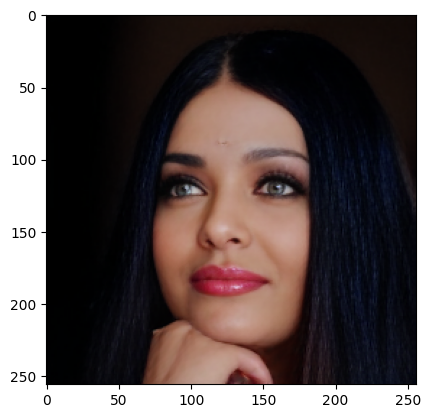

In [ ]:
import torch.nn as nn
from img_processing import *
from utils import freeze_module
import matplotlib.pyplot as plt
from tqdm import tqdm
class TensorExtractor(nn.Module):
    def __init__(self, latent, model) -> None:
        super().__init__()
        self.latent = latent
        self.model = model
        self.loss_fn = torch.nn.MSELoss()
    def forward(self, vector):
        trans_latent = self.latent + vector
        dec = self.model.decode(trans_latent.to(DEVICE))
        return dec
def optimize(extractor, target_latent):
    loss_fn = torch.nn.MSELoss()
    vector = torch.randn_like(latent, requires_grad=True)
    optim = torch.optim.Adam([vector], lr=1e-8)
    target = extractor.model.decode(target_latent.to(DEVICE))
    plt.imshow(custom_to_pil(target[0]))
    plt.show()
    return
    for i in tqdm(range(10)):
        # extractor.model.zero_grad()
        optim.zero_grad()
        trans_im = extractor.forward(vector)
        loss = loss_fn(trans_im, target)
        print(loss)
        loss.backward(retain_graph=True)
        optim.step()
    return vector

ex = TensorExtractor(latent, model).to(DEVICE)
trans_vec = optimize(ex, latent2)
# vec = ex.optimize()

In [ ]:
# import torch.nn as nn
# from img_processing import *
# from utils import freeze_module
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# class TensorExtractor(nn.Module):
#     def __init__(self, latent, model) -> None:
#         super().__init__()
#         #TODO tighter distribution
#         self.latent = latent
#         model.eval()
#         # freeze_module(model)
#         self.model = model
#         self.model.to_torchscript(method="trace", example_inputs=torch.ones((1, 3, 256, 256)))
#         self.loss_fn = torch.nn.BCELoss()
#         self.logits_loss = torch.nn.BCEWithLogitsLoss()
#     def forward(self, vector):
#         trans_latent = self.latent + vector
#         dec = self.model.decode(trans_latent.to(DEVICE))
#         # trans_im = custom_to_pil(dec[0])
#         return dec.squeeze()
#     def optimize(self):
#         vector = torch.randn_like(latent, requires_grad=True)
#         target = torch.tensor([[1., 0.]])
#         self.optim = torch.optim.Adam([vector])
#         intermediate = []
#         for i in tqdm(range(40)):
#             self.model.zero_grad()
#             self.optim.zero_grad()
#             trans_im = self(vector)
#             # if i % 10 == 0: 
#             #     intermediate.append(trans_im)
#             #     plt.figure(figsize=(3, 3))
#             #     plt.imshow(custom_to_pil(trans_im[0]))
#             #     plt.show()
#             inputs = processor(text=["a photo of a man", "a photo of a woman"], images=trans_im, return_tensors="pt", padding=True)
            
#             outputs = clip(**inputs)
#             logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
#             print(torch.autograd.grad(torch.mean(outputs.logits_per_image), inputs))
#             # probs = logits_per_image.softmax(dim=1) 
#             print(logits_per_image)
#             loss = self.logits_loss(logits_per_image, target) 
#             print(loss)
#             loss.backward(retain_graph=True)
#             self.optim.step()
#         show_latent(self.model, self.latent + vector)
#         return vector

# ex = TensorExtractor(latent, model).to(DEVICE)
# vec = ex.optimize()


# # from torch.utils.tensorboard import SummaryWriter

# # # default `log_dir` is "runs" - we'll be more specific here
# # writer = SummaryWriter('runs/ex')
# # tvec = torch.randn_like(latent)
# # writer.add_graph(ex, tvec)
# # writer.close()


        



/Users/erwann/dl/taming-transformers/taming/modules/diffusionmodules/model.py:181: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  w_ = w_ * (int(c)**(-0.5))
  0%|          | 0/40 [00:00<?, ?it/s]


TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:

vec

In [ ]:
target = torch.tensor([[1., 0.]])

In [ ]:
target.dtype

In [ ]:
latent.shape

In [ ]:
model.eval()
x = next(model.parameters())
x

In [ ]:
t.shape

In [ ]:
vec = torch.randn_like(latent)
op = torch.optim.Adam([vec])
print(op)